In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/participantstaska/Participant2.csv
/kaggle/input/participantstaska/Participant17.csv
/kaggle/input/participantstaska/Participant22.csv
/kaggle/input/participantstaska/Participant18.csv
/kaggle/input/participantstaska/Participant5.csv
/kaggle/input/participantstaska/Participant3.csv
/kaggle/input/participantstaska/Participant25.csv
/kaggle/input/participantstaska/Participant4.csv
/kaggle/input/participantstaska/Participant7.csv
/kaggle/input/participantstaska/Participant15.csv
/kaggle/input/participantstaska/Participant9.csv
/kaggle/input/participantstaska/Participant14.csv
/kaggle/input/participantstaska/Participant30.csv
/kaggle/input/participantstaska/Participant20.csv
/kaggle/input/participantstaska/Participant10.csv
/kaggle/input/participantstaska/Participant27.csv
/kaggle/input/participantstaska/Participant13.csv
/kaggle/input/participantstaska/Participant1.csv
/kaggle/input/participantstaska/Participant29.csv
/kaggle/input/participantstaska/Participant19.csv
/kaggle

# Task A
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
from sklearn.metrics import RocCurveDisplay


%matplotlib inline

# Inputing the Datasets
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [3]:
DF_listA= list()
DF_listB = list()

In [4]:
#Task A
for i in range (0, 30):
    DF_listA.insert(i, pd.read_csv('../input/participantstaska/Participant'+str(i+1)+'.csv') )

#Task B
for i in range (0, 30):
    DF_listB.insert(i, pd.read_csv('../input/participantstaskb/Participant'+str(i+1)+'.csv') )

In [5]:
training_subjects = np.array([1, 4, 5, 7, 9, 10, 11, 14, 2, 16, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30])
validation_subjects = np.array([3, 6, 12, 20, 25])
test_subjects = np.array([15,8,13,18,28])

In [6]:
#Task A
DF_train = list()
DF_validation = list()
DF_test = list()

#Task B
DF_trainB = list()
DF_validationB = list()
DF_testB = list()
k=0

In [7]:
#Task A
k=0

for i in training_subjects:
    DF_train.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0

for i in training_subjects:
    DF_trainB.insert(k, DF_listB[i-1])
    k=k+1

In [8]:
#Task A
k=0
for i in validation_subjects:
    DF_validation.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in validation_subjects:
    DF_validationB.insert(k, DF_listB[i-1])
    k=k+1

In [9]:
#Task A
k=0
for i in test_subjects:
    DF_test.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in test_subjects:
    DF_testB.insert(k, DF_listB[i-1])
    k=k+1

In [10]:
#Task A
trainData = pd.concat(DF_train, ignore_index=True)
validData = pd.concat(DF_validation, ignore_index=True)
testData = pd.concat (DF_test, ignore_index=True)

X_train = trainData.drop(['event'], axis=1)
y_train = pd.DataFrame(trainData.iloc[:,-1])

X_valid = validData.drop(['event'], axis=1)
y_valid = pd.DataFrame(validData.iloc[:,-1])

X_test = testData.drop(['event'], axis=1)
y_test = pd.DataFrame(testData.iloc[:,-1])



#Task B
trainDataB = pd.concat(DF_trainB, ignore_index=True)
validDataB = pd.concat(DF_validationB, ignore_index=True)
testDataB = pd.concat (DF_testB, ignore_index=True)

X_trainB = trainDataB.drop(['event'], axis=1)
y_trainB = pd.DataFrame(trainDataB.iloc[:,-1])

X_validB = validDataB.drop(['event'], axis=1)
y_validB = pd.DataFrame(validDataB.iloc[:,-1])

X_testB = testDataB.drop(['event'], axis=1)
y_testB = pd.DataFrame(testDataB.iloc[:,-1])

# Standardization by subjet
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Task A Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
DF_listAstd = list()

In [12]:
for i in range (0, 30):
    DF_listAstd.insert (i, DF_listA[i].drop(['event'], axis=1))

In [13]:
names= DF_listAstd[1].columns

In [14]:
scale= StandardScaler()
for i in range (0, 30):
    DF_listAstd[i]=scale.fit_transform(DF_listAstd[i])
    DF_listAstd[i]=pd.DataFrame(DF_listAstd[i], columns=names)

In [15]:
DF_train_std = list()
DF_valid_std = list()
DF_test_std = list()

In [16]:
k=0

for i in training_subjects:
    DF_train_std.insert(k, DF_listAstd[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_valid_std.insert(k, DF_listAstd[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_test_std.insert(k, DF_listAstd[i-1])
    k=k+1

In [17]:
X_train_std = pd.concat(DF_train_std, ignore_index=True)
X_valid_std = pd.concat(DF_valid_std, ignore_index=True)
X_test_std = pd.concat (DF_test_std, ignore_index=True)

In [18]:
X_test_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.849015,-0.962069,3.103113,5.453010,-2.053553,2.142066,-3.103113,-4.376918,-0.769908,-0.056617,...,0.027124,-1.990522,-1.209660,-0.446172,-0.361775,-0.361775,-1.390700,-1.390700,-0.343081,-0.639459
1,-0.849037,-0.961241,3.109000,5.482114,-2.075031,2.140610,-3.109000,-4.399432,-0.778470,-0.053945,...,-0.004436,-2.037631,-1.209660,-0.446172,-0.361767,-0.361767,-1.516002,-1.516002,-0.552457,-0.639185
2,-0.827607,-0.910432,3.998969,0.393562,0.864878,0.708649,-3.998969,-0.224417,-0.281094,-0.047046,...,-0.028708,-1.623079,-1.086011,-2.662393,-0.359740,-0.359740,1.324983,1.324983,3.189055,-0.639564
3,-0.803658,-0.854009,2.430907,0.292217,0.939463,-0.025070,-2.430907,-0.185868,-0.304297,0.036364,...,0.110085,-1.194907,-1.086011,-2.662393,-0.357702,-0.357702,1.473463,1.473463,2.516232,-0.639028
4,-0.770065,-0.793239,1.544201,-0.065738,0.618261,-0.457433,-1.544201,0.102377,-0.145343,0.062060,...,0.153167,-0.591126,-0.344118,-2.662393,-0.356053,-0.356053,1.167521,1.167521,1.361316,-0.640058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19525,-0.471728,-0.470952,0.154435,-0.206256,1.258822,-0.471602,-0.154435,0.220897,-1.962109,0.659903,...,-0.131079,-0.505206,-0.794060,-0.629221,-0.158183,-0.158183,-0.006787,-0.006787,0.906727,-0.336988
19526,-0.462767,-0.463877,0.762929,-0.574726,1.301156,-0.441486,-0.762929,0.579999,-1.860787,0.625795,...,0.110741,-0.441877,-0.745581,-0.629221,-0.158322,-0.158322,-0.020767,-0.020767,0.760620,-0.331746
19527,-0.441191,-0.452436,0.345630,-0.503384,1.348803,-0.295361,-0.345630,0.513254,-1.993949,0.526290,...,-0.190589,-0.472734,-0.745581,-0.411459,-0.157578,-0.157578,-0.119863,-0.119863,0.614114,-0.285345
19528,-0.436872,-0.443049,0.533419,-0.714604,1.282612,-0.265250,-0.533419,0.718294,-1.749829,0.473827,...,0.061150,-0.472903,-0.697102,-0.411459,-0.157029,-0.157029,-0.170081,-0.170081,0.511084,-0.244395


## Task B Standardization

In [19]:
DF_listBstd = list()

In [20]:
for i in range (0, 30):
    DF_listBstd.insert (i, DF_listB[i].drop(['event'], axis=1))

In [21]:
names= DF_listBstd[1].columns

In [22]:
scale= StandardScaler()
for i in range (0, 30):
    DF_listBstd[i]=scale.fit_transform(DF_listBstd[i])
    DF_listBstd[i]=pd.DataFrame(DF_listBstd[i], columns=names)

In [23]:
DF_trainB_std = list()
DF_validB_std = list()
DF_testB_std = list()

In [24]:
k=0

for i in training_subjects:
    DF_trainB_std.insert(k, DF_listBstd[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_validB_std.insert(k, DF_listBstd[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_testB_std.insert(k, DF_listBstd[i-1])
    k=k+1

In [25]:
X_trainB_std = pd.concat(DF_trainB_std, ignore_index=True)
X_validB_std = pd.concat(DF_validB_std, ignore_index=True)
X_testB_std = pd.concat (DF_testB_std, ignore_index=True)

In [26]:
X_testB_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.709083,-1.033585,5.675123,1.016567,3.857959,-1.371242,-5.675123,-0.610296,-2.093692,0.516947,...,-0.147971,-0.810236,-1.575651,-0.686389,-0.289253,-0.289253,-0.244831,-0.244831,0.413328,-0.194760
1,-0.709083,-1.033585,5.675123,1.016567,3.857959,-1.371242,-5.675123,-0.610296,-2.093692,0.516947,...,0.052794,-0.837027,-1.575651,-0.686389,-0.289255,-0.289255,-0.205259,-0.205259,0.491201,-0.192877
2,-0.730694,-0.985323,3.048626,2.031727,1.416432,1.036456,-3.048626,-1.635463,-0.990445,-0.019856,...,0.290294,-4.095331,-4.463759,-2.835691,-0.276221,-0.276221,-0.103152,-0.103152,13.448787,-0.192989
3,-0.756325,-0.941784,3.745908,0.717785,2.093207,0.658414,-3.745908,-0.482452,-1.169314,0.091412,...,0.132987,-4.106879,-4.523928,-2.835691,-0.270075,-0.270075,0.044976,0.044976,14.414322,-0.197698
4,-0.774379,-0.886359,2.867759,0.876267,1.718556,0.499864,-2.867759,-0.662097,-0.990969,0.080242,...,0.277913,-3.604170,-4.403590,-2.835691,-0.267205,-0.267205,0.524989,0.524989,11.323864,-0.235935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27375,-0.572384,-0.565975,0.617392,-0.583387,0.442670,-1.043809,-0.617392,0.581186,0.119205,0.211580,...,-0.013411,0.878351,0.051728,0.328402,-0.325784,-0.325784,1.517718,1.517718,1.184616,-0.501899
27376,-0.570458,-0.561308,0.876563,-0.626897,0.457890,-1.093698,-0.876563,0.621272,0.121734,0.223332,...,0.127176,1.008646,0.051728,-0.842568,-0.325849,-0.325849,1.492475,1.492475,1.002610,-0.500447
27377,-0.569413,-0.561959,0.427692,-0.442757,0.383166,-0.933134,-0.427692,0.450077,0.115493,0.185380,...,0.060787,1.051338,0.522324,-0.842568,-0.325924,-0.325924,1.295451,1.295451,0.722336,-0.499198
27378,-0.573976,-0.566313,0.875551,-0.581274,0.442375,-1.022997,-0.875551,0.579560,0.118885,0.206608,...,0.049072,1.371763,1.369398,-0.842568,-0.325941,-0.325941,1.449224,1.449224,0.564693,-0.494819


In [27]:
X_train=X_train_std
X_valid=X_valid_std
X_test=X_test_std

In [28]:
X_trainB = X_trainB_std 
X_validB = X_validB_std 
X_testB = X_testB_std

# Training the model
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Task A
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Random Undersampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
y_train.value_counts()

event        
neutral          51773
smile             8342
frown             8016
eyebrow_raise     7587
squeeze_eyes      7192
dtype: int64

In [31]:
dict_us = {
  "eyebrow_raise": 4834,
  "frown": 8016,
  "neutral": 9000 ,
  "smile": 5374 ,
  "squeeze_eyes": 7192 
}

In [32]:
undersample = RandomUnderSampler(sampling_strategy=dict_us, random_state=40)

In [33]:
X_train_rus, y_train_rus = undersample.fit_resample(X_train, y_train)

In [34]:
y_train_rus['event'].value_counts()

neutral          9000
frown            8016
squeeze_eyes     7192
smile            5374
eyebrow_raise    4834
Name: event, dtype: int64

### Random Forest - Random Undersampling

In [35]:
clf_rf_rus = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_rus.fit(X_train_rus, y_train_rus)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [36]:
y_pred_rf_rus = clf_rf_rus.predict(X_valid)
score_rf_rus = clf_rf_rus.score(X_valid, y_valid)
f1_rf_rus = f1_score(y_valid, y_pred_rf_rus, average='macro')
print ('Accuracy: '+str(score_rf_rus*100)+' %')
print ('F1-Score: '+str(f1_rf_rus))

Accuracy: 82.79734558448187 %
F1-Score: 0.7456726506494322


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


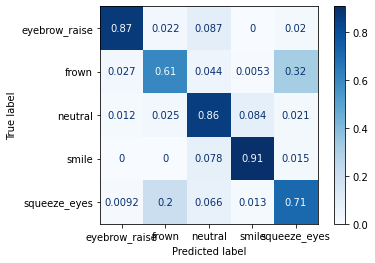

In [37]:
plot_confusion_matrix(estimator=clf_rf_rus, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [38]:
y_pred_rf_rus = clf_rf_rus.predict(X_test)
score_rf_rus = clf_rf_rus.score(X_test, y_test)
f1_rf_rus = f1_score(y_test, y_pred_rf_rus, average='macro')
print ('Accuracy: '+str(score_rf_rus*100)+' %')
print ('F1-Score: '+str(f1_rf_rus))

Accuracy: 87.68561187916026 %
F1-Score: 0.8333101763521309


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


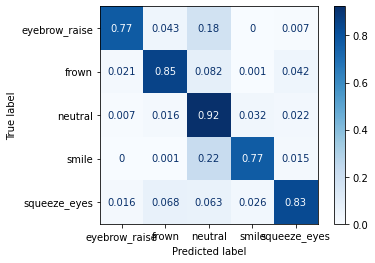

In [39]:
plot_confusion_matrix(estimator=clf_rf_rus, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Random Undersampling

In [40]:
xgb_rus = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_rus = le.fit_transform(y_train_rus)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

In [42]:
xgb_rus.fit(X_train_rus, y_trainXGB_rus)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [43]:
y_predXGB_rus = xgb_rus.predict(X_valid)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_validXGB, predictions_rus)
f1_xgb_rus = f1_score(y_validXGB, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 84.14497192445126 %
F1-Score: 0.7686084443824243


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


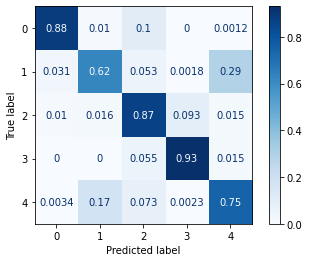

In [44]:
plot_confusion_matrix(estimator=xgb_rus, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [45]:
y_predXGB_rus = xgb_rus.predict(X_test)
predictions_rus = [round(value) for value in y_predXGB_rus]
score_xgb_rus = accuracy_score(y_testXGB, predictions_rus)
f1_xgb_rus = f1_score(y_testXGB, predictions_rus, average='macro')
print ('Accuracy: '+str(score_xgb_rus*100)+' %')
print ('F1-Score: '+str(f1_xgb_rus))

Accuracy: 88.06451612903226 %
F1-Score: 0.8360158315595576


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


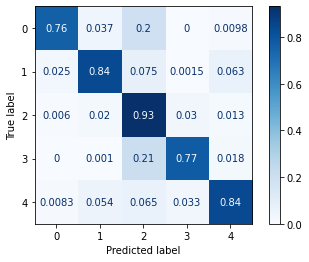

In [46]:
plot_confusion_matrix(estimator=xgb_rus, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

## One Sided Selection Undersampling

In [47]:
from imblearn.under_sampling import OneSidedSelection

In [48]:
y_train.value_counts()

event        
neutral          51773
smile             8342
frown             8016
eyebrow_raise     7587
squeeze_eyes      7192
dtype: int64

In [49]:
undersample = OneSidedSelection(n_neighbors=5, n_seeds_S=200, random_state=42)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

In [50]:
y_train_us.value_counts()

event        
neutral          20854
squeeze_eyes      7192
frown             5714
smile             4607
eyebrow_raise     1679
dtype: int64

### Random Forest - OSS

In [51]:
clf_rf_us = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_us.fit(X_train_us, y_train_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [52]:
y_pred_rf_us = clf_rf_us.predict(X_valid)
score_rf_us = clf_rf_us.score(X_valid, y_valid)
f1_rf_us = f1_score(y_valid, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 86.94742215416028 %
F1-Score: 0.7732700026803604


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


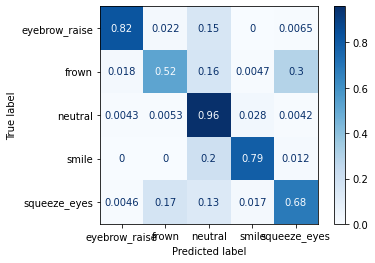

In [53]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [54]:
y_pred_rf_us = clf_rf_us.predict(X_test)
score_rf_us = clf_rf_us.score(X_test, y_test)
f1_rf_us = f1_score(y_test, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 87.01484895033282 %
F1-Score: 0.8137044817555313


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


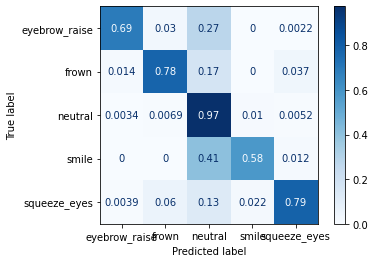

In [55]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - OSS

In [56]:
xgb_us = XGBClassifier(n_estimators=100, booster='gblinear')
le = LabelEncoder()
y_trainXGB_us = le.fit_transform(y_train_us)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

In [58]:
xgb_us.fit(X_train_us, y_trainXGB_us)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, ...)

In [59]:
y_predXGB_us = xgb_us.predict(X_valid)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_validXGB, predictions_us)
f1_xgb_us = f1_score(y_validXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 84.59418070444104 %
F1-Score: 0.7296091854232487


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


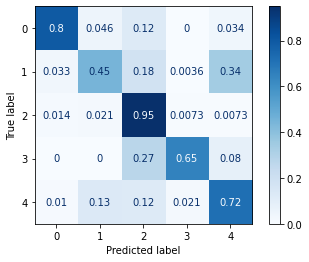

In [60]:
plot_confusion_matrix(estimator=xgb_us, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [61]:
y_predXGB_us = xgb_us.predict(X_test)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_testXGB, predictions_us)
f1_xgb_us = f1_score(y_testXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 85.79109062980031 %
F1-Score: 0.7894546198688579


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


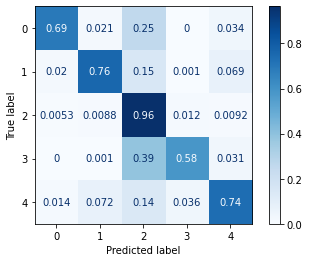

In [62]:
plot_confusion_matrix(estimator=xgb_us, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

## Oversampling

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
y_train.value_counts()

event        
neutral          51773
smile             8342
frown             8016
eyebrow_raise     7587
squeeze_eyes      7192
dtype: int64

In [65]:
dict_os = {
  "eyebrow_raise": 48834,
  "frown": 44230,
  "neutral": 51773 ,
  "smile": 42374 ,
  "squeeze_eyes": 43423 
}

In [66]:
oversample = SMOTE(sampling_strategy=dict_os, k_neighbors=5)

In [67]:
X_train_us, y_train_us = oversample.fit_resample(X_train, y_train)

In [68]:
y_train_us.value_counts()

event        
neutral          51773
eyebrow_raise    48834
frown            44230
squeeze_eyes     43423
smile            42374
dtype: int64

### Random Forest - OS

In [69]:
clf_rf_us = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_us.fit(X_train_us, y_train_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [70]:
y_pred_rf_us = clf_rf_us.predict(X_valid)
score_rf_us = clf_rf_us.score(X_valid, y_valid)
f1_rf_us = f1_score(y_valid, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 86.10515569167943 %
F1-Score: 0.77135114452893


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


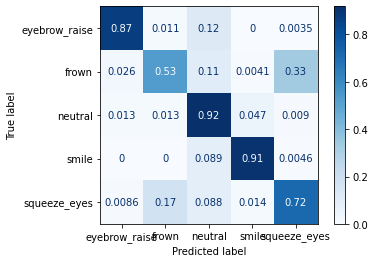

In [71]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [72]:
y_pred_rf_us = clf_rf_us.predict(X_test)
score_rf_us = clf_rf_us.score(X_test, y_test)
f1_rf_us = f1_score(y_test, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 88.59190988223247 %
F1-Score: 0.842453689994106


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


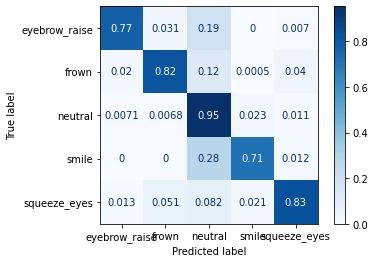

In [73]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - OS

In [74]:
le = LabelEncoder()
y_trainXGB_us = le.fit_transform(y_train_us)
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
xgb_us = XGBClassifier(n_estimators=100)
xgb_us.fit(X_train_us, y_trainXGB_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [76]:
y_predXGB_us = xgb_us.predict(X_valid)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_validXGB, predictions_us)
f1_xgb_us = f1_score(y_validXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 83.85911179173048 %
F1-Score: 0.7605407956327681


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


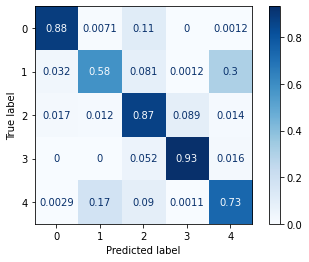

In [77]:
plot_confusion_matrix(estimator=xgb_us, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [78]:
y_predXGB_us = xgb_us.predict(X_test)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_testXGB, predictions_us)
f1_xgb_us = f1_score(y_testXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 87.76753712237583 %
F1-Score: 0.8342504237792532


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


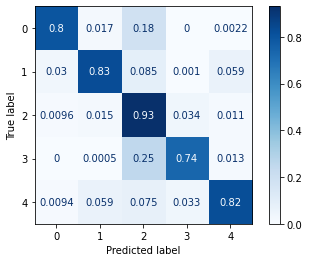

In [79]:
plot_confusion_matrix(estimator=xgb_us, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

<br>

# Task B
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## One Sided Selection - Undersampling B

In [80]:
from imblearn.under_sampling import OneSidedSelection

In [81]:
y_trainB.value_counts()

event        
neutral          56524
smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
dtype: int64

In [82]:
undersample = OneSidedSelection(n_neighbors=5, n_seeds_S=200, random_state=42)
X_trainB_us, y_trainB_us = undersample.fit_resample(X_trainB, y_trainB)

In [83]:
y_trainB_us.value_counts()

event        
neutral          20538
eyebrow_raise    13140
frown             6918
squeeze_eyes      3436
smile             1663
dtype: int64

### Random Forest 

In [84]:
clf_rfB_us = RandomForestClassifier(random_state=42)
clf_rfB_us.fit(X_trainB_us, y_trainB_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [85]:
y_pred_rfB_us = clf_rfB_us.predict(X_validB)
score_rfB_us = clf_rfB_us.score(X_validB, y_validB)
f1_rfB_us = f1_score(y_validB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 84.1551347414421 %
F1-Score: 0.7443974268476345


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


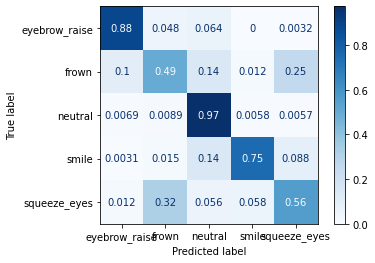

In [86]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [87]:
y_pred_rfB_us = clf_rfB_us.predict(X_testB)
score_rfB_us = clf_rfB_us.score(X_testB, y_testB)
f1_rfB_us = f1_score(y_testB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 85.4200146092038 %
F1-Score: 0.7995970817721679


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


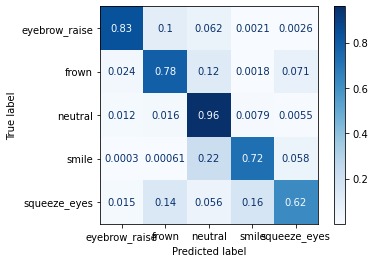

In [88]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost

In [89]:
y_trainXGB_B_us = le.fit_transform(y_trainB_us)
y_trainXGB_B = le.fit_transform(y_trainB)
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
xgbB_us = XGBClassifier(n_estimators=100)
xgbB_us.fit(X_trainB_us, y_trainXGB_B_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [91]:
y_predXGB_B_us = xgbB_us.predict(X_validB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_validXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_validXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

Accuracy: 83.72906045156591 %
F1-Score: 0.7446289442809201


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


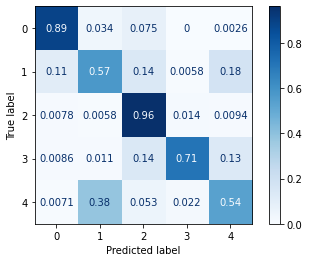

In [92]:
plot_confusion_matrix(estimator=xgbB_us, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [93]:
y_predXGB_B_us = xgbB_us.predict(X_testB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_testXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_testXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

Accuracy: 86.09569028487948 %
F1-Score: 0.8095651287165513


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


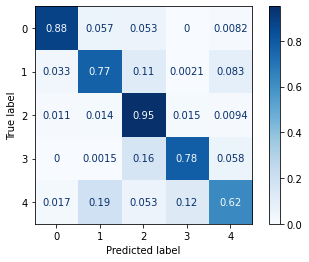

In [94]:
plot_confusion_matrix(estimator=xgbB_us, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

## Random Undersampling

In [95]:
dict_os = {
  "eyebrow_raise": 13140,
  "frown": 13159,
  "neutral": 12000 ,
  "smile": 13578 ,
  "squeeze_eyes": 13319 
}

In [96]:
y_trainB.value_counts()

event        
neutral          56524
smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
dtype: int64

In [97]:
undersample = RandomUnderSampler(sampling_strategy=dict_os, random_state=42)
X_trainB_us, y_trainB_us = undersample.fit_resample(X_trainB, y_trainB)

In [98]:
y_trainB_us['event'].value_counts()

smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
neutral          12000
Name: event, dtype: int64

### Random Forest

In [99]:
clf_rfB_us = RandomForestClassifier(random_state=42)
clf_rfB_us.fit(X_trainB_us, y_trainB_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [100]:
y_pred_rfB_us = clf_rfB_us.predict(X_validB)
score_rfB_us = clf_rfB_us.score(X_validB, y_validB)
f1_rfB_us = f1_score(y_validB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 84.51201747997086 %
F1-Score: 0.7550973814294464


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


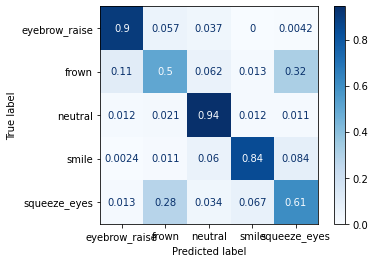

In [101]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [102]:
y_pred_rfB_us = clf_rfB_us.predict(X_testB)
score_rfB_us = clf_rfB_us.score(X_testB, y_testB)
f1_rfB_us = f1_score(y_testB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 84.36084733382032 %
F1-Score: 0.7952090552153293


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


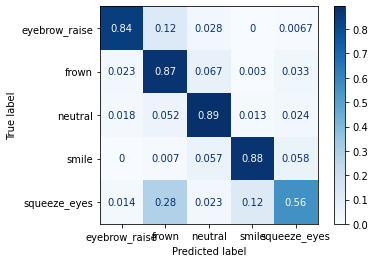

In [103]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost 

In [104]:
xgbB_us = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGB_B_us = le.fit_transform(y_trainB_us)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)

In [106]:
xgbB_us.fit(X_trainB_us, y_trainXGB_B_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [107]:
y_predXGB_B_us = xgbB_us.predict(X_validB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_validXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_validXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

Accuracy: 84.70502549162417 %
F1-Score: 0.7612138668893453


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


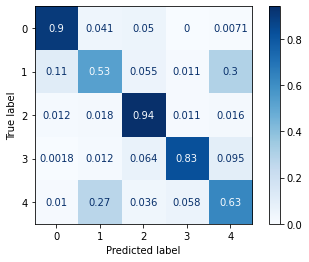

In [108]:
plot_confusion_matrix(estimator=xgbB_us, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [109]:
y_predXGB_B_us = xgbB_us.predict(X_testB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_testXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_testXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

Accuracy: 85.88020452885317 %
F1-Score: 0.8204966787943249


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


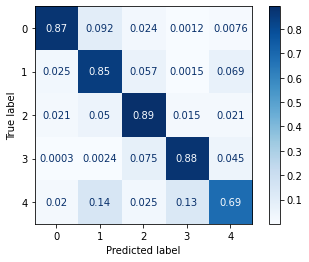

In [110]:
plot_confusion_matrix(estimator=xgbB_us, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

## Oversampling

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
y_trainB.value_counts()

event        
neutral          56524
smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
dtype: int64

In [113]:
dict_os2 = {
  "eyebrow_raise": 53834,
  "frown": 54230,
  "neutral": 56573 ,
  "smile": 52374 ,
  "squeeze_eyes": 53423 
}

In [114]:
oversample = SMOTE(sampling_strategy=dict_os2, k_neighbors=5)
X_trainB_os, y_trainB_os = oversample.fit_resample(X_trainB, y_trainB)
y_trainB_os.value_counts()

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (56573) in class neutral will be larger than the number of samples in the majority class (class #neutral -> 56524)
  f"After over-sampling, the number of samples ({n_samples})"


event        
neutral          56573
frown            54230
eyebrow_raise    53834
squeeze_eyes     53423
smile            52374
dtype: int64

### Random Forest

In [115]:
clf_rfB_os = RandomForestClassifier(random_state=42)
clf_rfB_os.fit(X_trainB_os, y_trainB_os)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [116]:
y_pred_rfB_os = clf_rfB_os.predict(X_validB)
score_rfB_os = clf_rfB_os.score(X_validB, y_validB)
f1_rfB_os = f1_score(y_validB, y_pred_rfB_os, average='macro')
print ('Accuracy: '+str(score_rfB_os*100)+' %')
print ('F1-Score: '+str(f1_rfB_os))

Accuracy: 84.58485069191552 %
F1-Score: 0.7544923307875917


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


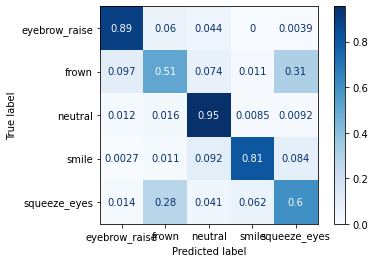

In [117]:
plot_confusion_matrix(estimator=clf_rfB_os, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [118]:
y_pred_rfB_os = clf_rfB_os.predict(X_testB)
score_rfB_os = clf_rfB_os.score(X_testB, y_testB)
f1_rfB_os = f1_score(y_testB, y_pred_rfB_os, average='macro')
print ('Accuracy: '+str(score_rfB_os*100)+' %')
print ('F1-Score: '+str(f1_rfB_os))

Accuracy: 84.95982468955442 %
F1-Score: 0.7937620158605967


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


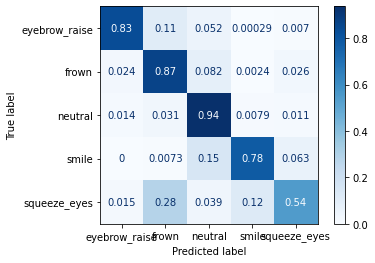

In [119]:
plot_confusion_matrix(estimator=clf_rfB_os, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost

In [120]:
y_trainXGB_B_os = le.fit_transform(y_trainB_os)
y_trainXGB_B = le.fit_transform(y_trainB)
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
xgbB_os = XGBClassifier(n_estimators=100)
xgbB_os.fit(X_trainB_os, y_trainXGB_B_os)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [122]:
y_predXGB_B_os = xgbB_os.predict(X_validB)
predictions_B_os = [round(value) for value in y_predXGB_B_os]
score_xgb_B_os = accuracy_score(y_validXGB_B, predictions_B_os)
f1_xgb_B_os = f1_score(y_validXGB_B, predictions_B_os, average='macro')
print ('Accuracy: '+str(score_xgb_B_os*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_os))

Accuracy: 84.7414420975965 %
F1-Score: 0.7669551397718503


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


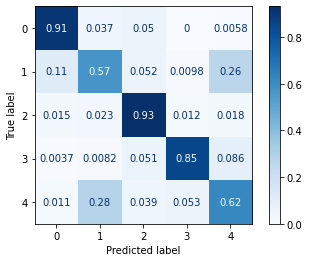

In [123]:
plot_confusion_matrix(estimator=xgbB_os, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [124]:
y_predXGB_B_os = xgbB_os.predict(X_testB)
predictions_B_os = [round(value) for value in y_predXGB_B_os]
score_xgb_B_os = accuracy_score(y_testXGB_B, predictions_B_os)
f1_xgb_B_os = f1_score(y_testXGB_B, predictions_B_os, average='macro')
print ('Accuracy: '+str(score_xgb_B_os*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_os))

Accuracy: 85.47114682249818 %
F1-Score: 0.808767873325342


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


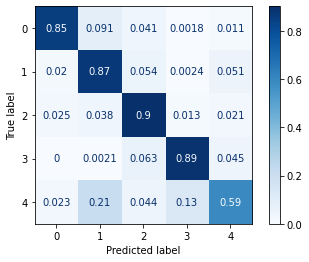

In [125]:
plot_confusion_matrix(estimator=xgbB_os, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')